<a href="https://colab.research.google.com/github/qodnd1848/lectures-bigphys/blob/master/1204%EA%B3%BC%EC%A0%9C%EC%A0%9C%EC%B6%9C%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
HW1. f(x) = A*sin(kx) + Gauss 에 따라서 데이터 생성하고 fitting 해서 parameter A, k 를 다시 찾기

In [431]:
import numpy as np
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
#1-1. 데이터 생성

In [524]:
def gen_fx(x, A, k):
  data = A*np.sin(k*x)
  return data
#여기서 바로 랜덤을 더할려고 했는데, y = gen_fx(x, 10, 0.5)으로 Y값을 만들면 랜덤 결과가 동일하게 적용되는것 같다.

A_const = 10
k_const = 0.7

In [525]:
x = np.linspace(0, 8*(math.pi), 1000)

In [526]:
#print(x)

In [527]:
y_real = gen_fx(x, A_const, k_const)

In [528]:
#print(y)

In [529]:
y_noise = y_real + 0.5*np.random.normal(0,1, size=len(x))

In [530]:
#1-2. Loss 값 최소로 만드는 구간 찾기 

In [531]:
"""
def Loss(para):
  loss = 0
  for i in range(len(x)):
    loss += (y_real[i]-gen_fx(x[i],para[0],para[1]))**2
  return loss
"""
def Loss(para):
  loss = (y_real[700]-gen_fx(x[700],para[0],para[1]))**2
  return loss


In [532]:
i = 812
print((y_noise[i]-gen_fx(x[i],A_const,k_const))**2)

0.020059989171862358


In [533]:
i = 900
print((y_real[i]-gen_fx(x[i],A_const,k_const))**2)

0.0


In [534]:
def gradient(f,x):
  h = 1e-9
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val + h   
    fxh1 = f(x)

    x[idx] = tmp_val - h   
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [535]:
gradient(Loss, np.array([A_const, k_const]))

array([-1.05129817e-16,  3.11532165e-12])

In [536]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = gradient(f,x)
    x -= lr * grad

  return x

In [543]:
init_x = np.array([5.0, 0.5])
sol = gradient_descent(Loss, init_x=init_x, lr=0.0001, step_num=100000)
print(sol)

[4.9992683  0.56319001]


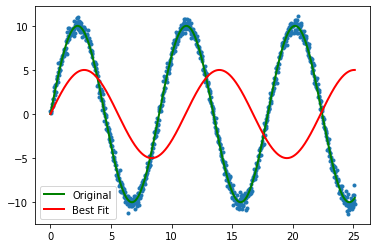

In [544]:
plt.scatter(x, y_noise, marker='.')
plt.plot(x, y_real, color='green', linewidth=2)
plt.plot(x, gen_fx(x, *sol), color='red', linewidth=2)
plt.legend(['Original', 'Best Fit'], loc=3)
plt.show()

In [ ]:
#HW2. 위의 f(x)에 대해 A, k 찾기를 여러번 수행하고, 이 때 카이^2 값의 히스토그램을 그리기